Задание 1. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции по указанной схеме

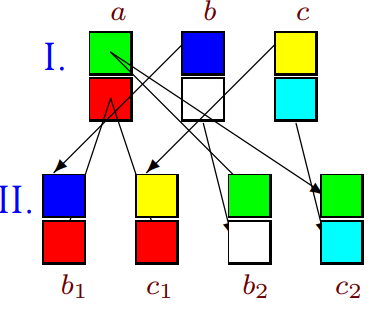

In [ ]:
# Функция качества хромосомы
def qZ1(x, y):
    return (x - 3*y + 1) / (3*x**2 + 3*y**2 + 1)

# Функция количества хромосом
def qSumZ1(Z):
    return sum(Z)

In [ ]:
# Программирование схемы обмена хромосомами
def exchangeScheme(oldX, oldY, sortedId): 
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    
    X[0] = oldX[sortedId[0]]
    
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    
    Y[2] = oldY[sortedId[0]]
    
    Y[3] = oldY[sortedId[1]]
    
    return X, Y

# Сортировка массива качества потомков и выделение полученных индексов:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

# Функция шага эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z

# Приведение эволюционных изменений 
def evoSteps(Z_n, Sum_Z_n, X, Y, stepsNum = 4):
    results = []
    
    for i in range(4):
        arrZ = [Z_n(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, Sum_Z_n(arrZ), arrZ])
    
    return X, Y, results

In [ ]:
# Объявление массивов хромосом
X1 = [-2, -1, 0, 1]
Y1 = [-2, -1, 0, 1]

In [ ]:
results = evoSteps(qZ1, qSumZ1, X1, Y1)

# Вывод полученных значений для показателя качества хромосомы в популяции
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z: {max(qualityArrZ)}')

max_1_step: 0.6352040816326531
max_2_step: -1.002857142857143
max_3_step: 2.150989010989011
max_4_step: 2.2142857142857144
max Z: 1.5


Задание 2. Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по варианту ниже

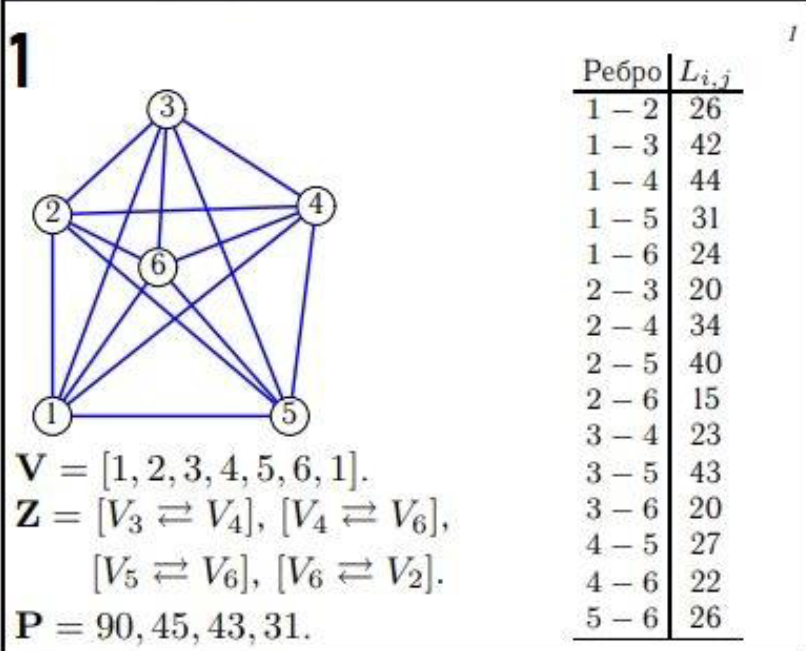

In [7]:
import networkx as nx
from math import e

In [ ]:
# Функция вероятности 
def probability(delta, T):
    return 100 * e **(-delta /  T)

# Функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

# Вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

# Вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
        
    return sum(edges)

# Однократная расстановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0]-decrement], arrV[Z[1]-decrement] = arrV[Z[1]-decrement], arrV[Z[0]-decrement]
    
    return arrV

# Перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

# Выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # поиск длины пути
    arrSum = [sumLength]
    
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength # разница длин нового и старого маршрута
        
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности
            
            if p > P[i]:
                V = newV
                sumLength = newS
                
        else:
            V = newV
            sumLength = newS
        
        T = reductTemp(T) # вычисление температуры
        
    return V, arrSum

# Отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    
    # проход по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if ((distance[0] == bestRoute[i]) and (distance[1] == bestRoute[i+1])) or ((distance[1]  == bestRoute[i]) and (distance[0] == bestRoute[i+1])):
                newDistances.append(distance)
                
    graph = nx.Graph() # создание графа
    
    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
    
    # отрисовка с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

In [ ]:
# Данные задачи

#длины рёбер
distances = [(1, 2, 20), (1, 3, 40), (1, 4, 42), (1, 5, 33), (1, 6, 21), (2, 3, 26), (2, 4, 38), (2, 5, 42), (2, 6, 17), (3, 4, 22), (3, 5, 43), (3, 6, 21), (4, 5, 27), (4, 6, 22), (5, 6, 26)]

V1 = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z1 = [(3, 4), (4, 6), (5, 2), (6, 2)] # последовательость замен вершин
P1 = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

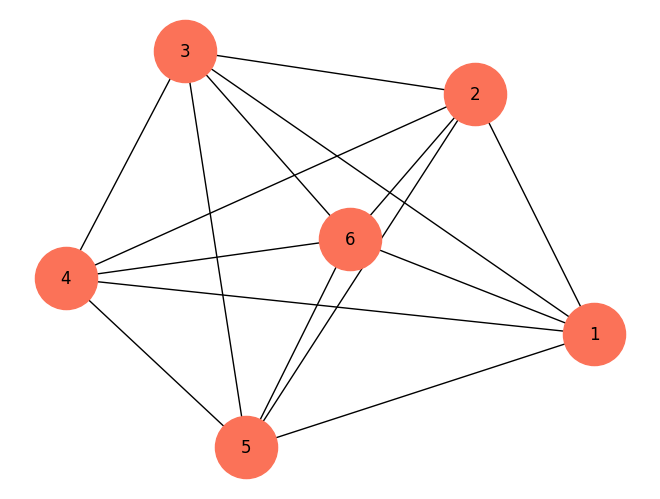

In [ ]:
# Отрисовка начального графа
graph = nx.Graph()

graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 3, 4, 5, 6, 2, 1]
Длина лучшего выбранного маршрута: 33
Длины всех рассмотренных маршрутов: [60, 38, 80, 55, 85]


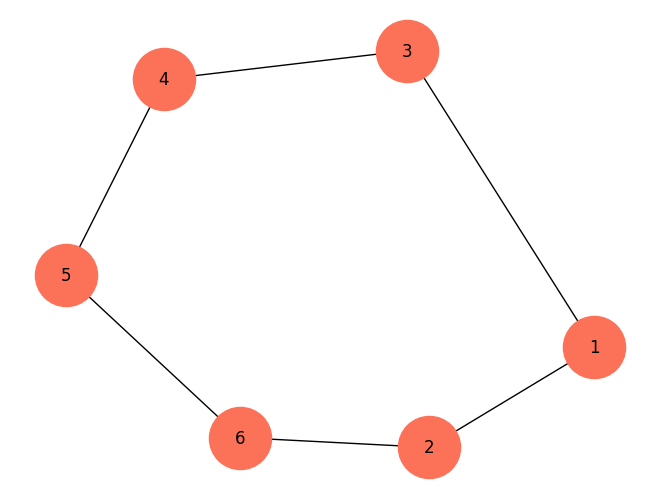

In [ ]:
# Расчёт наилучшего маршрута и его длины
bestRoute, arrLength = chooseRoute(distances, V1, Z1, T, P1)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута